<a href="https://colab.research.google.com/github/SaiMithunPunna/AIDS/blob/main/anamaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Datasets/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df=df.drop(columns='RiskLevel' , axis=1)

In [ ]:
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


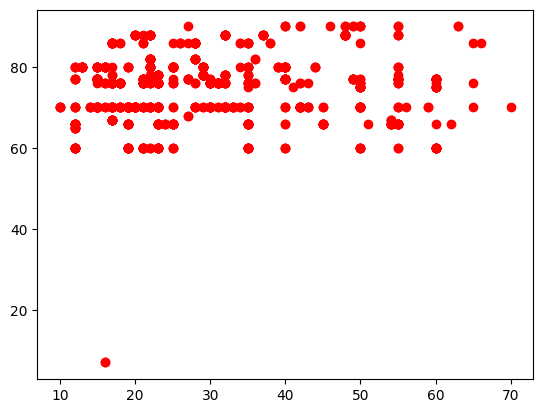

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'] , df['HeartRate'] , color='red')

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf = IsolationForest(contamination=0.1)
clf.fit(df)
predictions = clf.predict(df)

In [ ]:
predictions

array([ 1,  1,  1, ..., -1,  1,  1])

In [ ]:
import numpy as np
abn_ind = np.where(predictions<0)
abn_ind

(array([   7,   19,   20,   35,  105,  108,  110,  111,  114,  117,  123,
         127,  130,  137,  152,  166,  180,  182,  210,  232,  239,  248,
         262,  275,  276,  278,  316,  317,  319,  326,  337,  338,  339,
         340,  341,  362,  370,  373,  413,  416,  417,  419,  422,  425,
         426,  428,  431,  432,  435,  442,  458,  471,  482,  486,  502,
         505,  506,  535,  538,  551,  554,  583,  596,  599,  603,  631,
         640,  644,  658,  661,  670,  679,  683,  687,  689,  787,  789,
         848,  849,  910,  928,  939,  955,  959,  961,  968,  976,  982,
         988,  992,  994, 1000, 1002, 1009, 1010, 1011]),)

In [ ]:
X = df.values

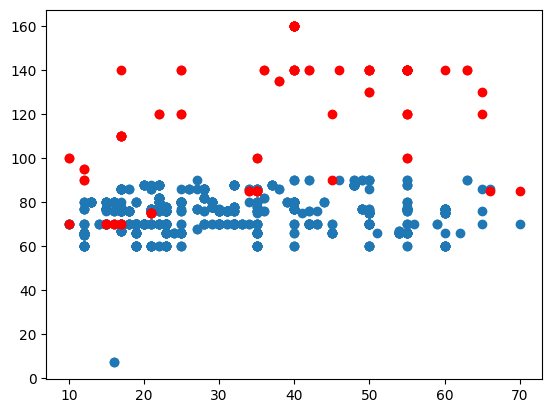

In [ ]:
abn_ind = np.where(predictions<0)
plt.scatter(df['Age'],df['HeartRate'])
plt.scatter(X[abn_ind,0],X[abn_ind,1],color='red')